In [10]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
from random import randint

In [11]:
df = pd.read_csv("Datasets/us-counties.csv", encoding='utf-8')

In [12]:
df = df[['state', 'date', 'cases']]
df['date'] = pd.to_datetime(df.date)
df = pd.DataFrame(df)

In [5]:
covid = df.groupby(['state','date'], as_index=False)['cases'].sum()
covid = covid.sort_values(['date'], ascending=False)
covid.head()

,state,date,cases
3863,Wyoming,2020-05-11,669
120,Alaska,2020-05-11,380
3345,Utah,2020-05-11,6364
227,Arizona,2020-05-11,11380
2399,New York,2020-05-11,342267


In [6]:
df = (covid[covid['date'].eq("2020-05-11")].sort_values(by="cases",ascending=False).head(10))
df

,state,date,cases
2399,New York,2020-05-11,342267
2265,New Jersey,2020-05-11,139945
1095,Illinois,2020-05-11,79123
1654,Massachusetts,2020-05-11,78462
397,California,2020-05-11,69513
2848,Pennsylvania,2020-05-11,60557
1717,Michigan,2020-05-11,47526
3268,Texas,2020-05-11,40988
730,Florida,2020-05-11,40974
530,Connecticut,2020-05-11,33765


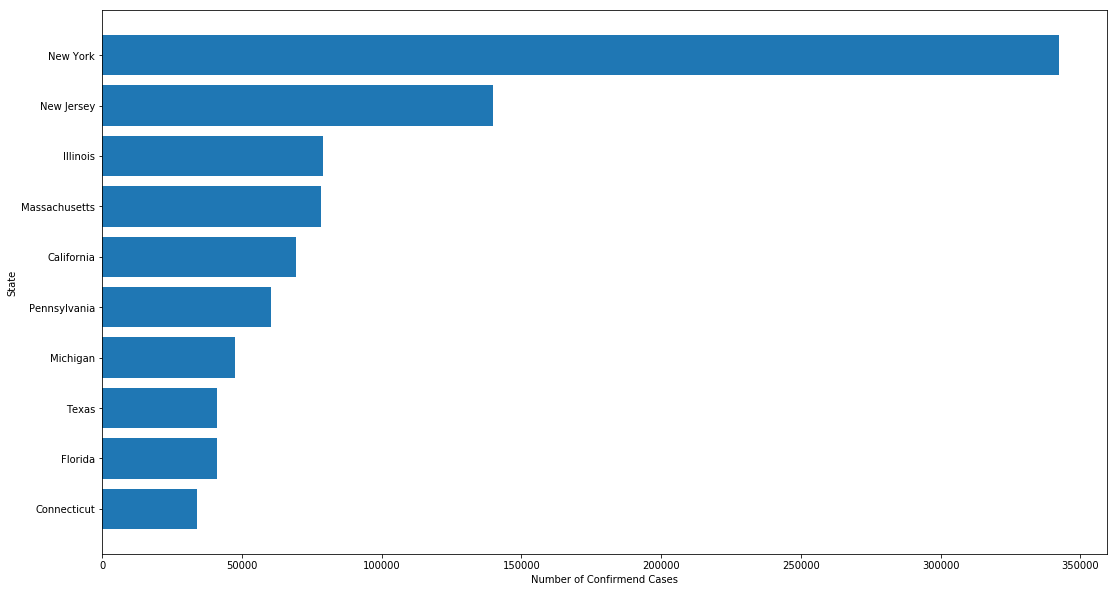

In [7]:

#plot the initial barchart, then flipping chart
dff=df[::-1]
fig, ax = plt.subplots(figsize=(18, 10))
ax.barh(dff['state'], dff['cases'])
plt.xlabel('Number of Confirmend Cases')
plt.ylabel('State')
plt.show()

In [13]:
import random
color_code = []
random.seed(1000)
for i in range(len(covid.state.unique())):
    color_code.append('#%06X' % randint(0, 0xFFFFFF))    
colors = dict(zip(covid.state.unique(),color_code))

Text(1, 0.4, '2020-05-11')

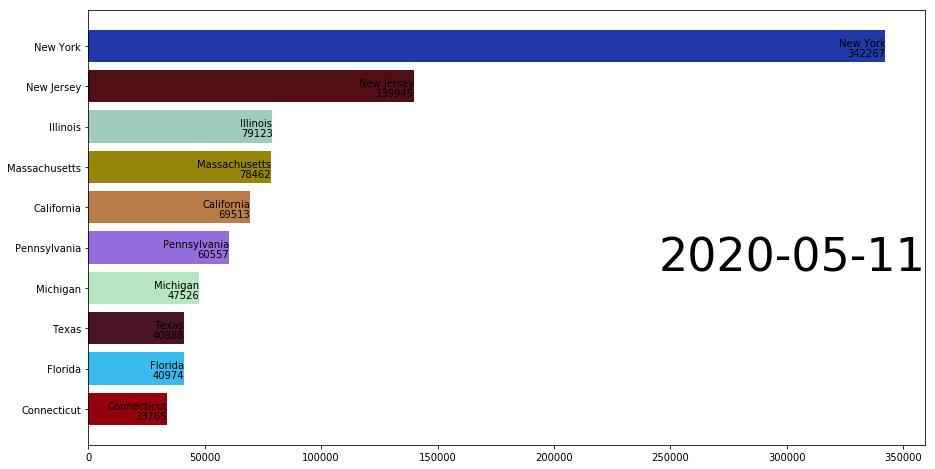

In [14]:
fig, ax = plt.subplots(figsize=(15, 8))
# pass colors values to `color=`
ax.barh(dff['state'], dff['cases'], color=[colors[x] for x in dff['state']])
# iterate over the values to plot labels and values 
for i, (value, name) in enumerate(zip(dff['cases'], dff['state'])):
    ax.text(value, i,     name,            ha='right')  
    ax.text(value, i-0.25,     value,           ha='right')  
# Add year right middle portion of canvas
ax.text(1, 0.4, "2020-05-11", transform=ax.transAxes, size=46, ha='right')

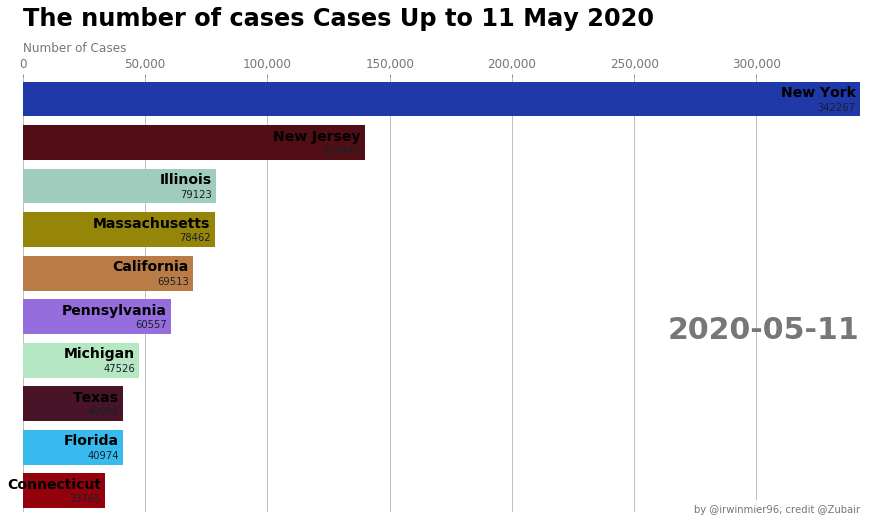

In [18]:
fig, ax = plt.subplots(figsize=(15, 8)) #making function make_barchart so we can call it into a FuncAnimator feature
def make_barchart(date,case="cases"):
    dff= (covid[covid['date'].eq(date)].sort_values(by=case,ascending=False).head(10))[::-1]
    ax.clear()
    color_code = []  #Assigning the color
    random.seed(1000)
    for i in range(len(covid.state.unique())):
        color_code.append('#%06X' % randint(0, 0xFFFFFF))
    colors = dict(zip(covid.state.unique(),color_code)) #giving random colors to states
    ax.barh(dff['state'], dff[case], color=[colors[x] for x in dff['state']])
    dx = dff[case].max() / 200  
    for i, (value, name) in enumerate(zip(dff[case], dff['state'])): #setting text size and position in the chart
        ax.text(value-dx, i, name,  size=14, weight=600, ha='right', va='bottom')
        ax.text(value-dx, i-.25, value, size=10, color='#17202A', ha='right', va='baseline')
    ax.text(1, 0.4, date, transform=ax.transAxes, color='#777777', size=30, ha='right', weight=800)
    ax.text(0, 1.06, 'Number of Cases', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'The number of '+str(case)+' Cases Up to 11 May 2020',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by @irwinmier96; credit @Zubair', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
    
make_barchart('2020-05-11')
plt.savefig("Visualizations/US_States_COVID_May_11_Numbers")

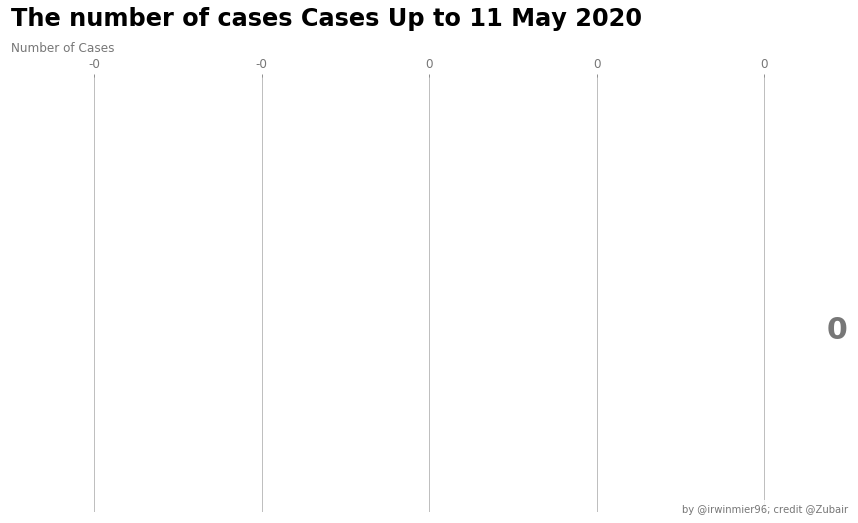

In [22]:
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, make_barchart, frames=100)
HTML(animator.to_jshtml()) 